# PROJECT INTRODUCTION 

# 🧠 Customer Churn Prediction (Machine Learning Project)
**Objective:** Predict which telecom customers are likely to churn (leave) using data-driven insights.

**Tools Used:** Python, Pandas, Matplotlib, Seaborn, Scikit-learn, XGBoost  
**Techniques:** EDA, Feature Engineering, Model Building, Hyperparameter Tuning, Cross-Validation

# STAGE ONE: IMPORT LIBRARIES 

In [87]:
# IMPORT LIBRARIES 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier


# STAGE TWO: LOAD AND INSPECT THE DATA 

In [88]:
#LOAD AND CHECK THE DATA TO KNOW WHAT YOU ARE WORKING WITH 
df = pd.read_csv("C:/Users/Dell/Documents/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# View first few rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [89]:
# STRUCTURE CHECK AND CHECKING FOR MISSING VALUES

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [90]:
#DESCRIBE THE DATA 
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [91]:
#CHECK FOR MISSING VALUES 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# EXPLORATORY DATA ANALYSIS 

C:\Users\Dell\AppData\Local\Temp\ipykernel_16928\2084909314.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


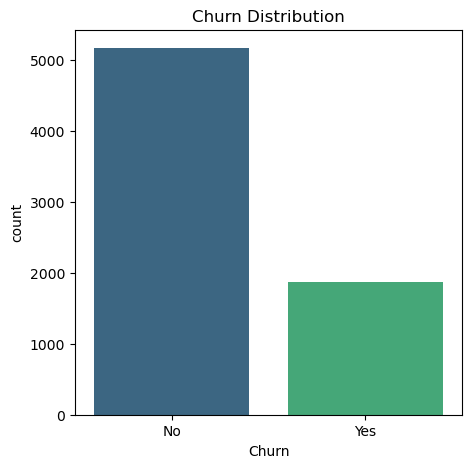

In [92]:
# Check churn distribution
plt.figure(figsize=(5,5))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title("Churn Distribution")
plt.show()

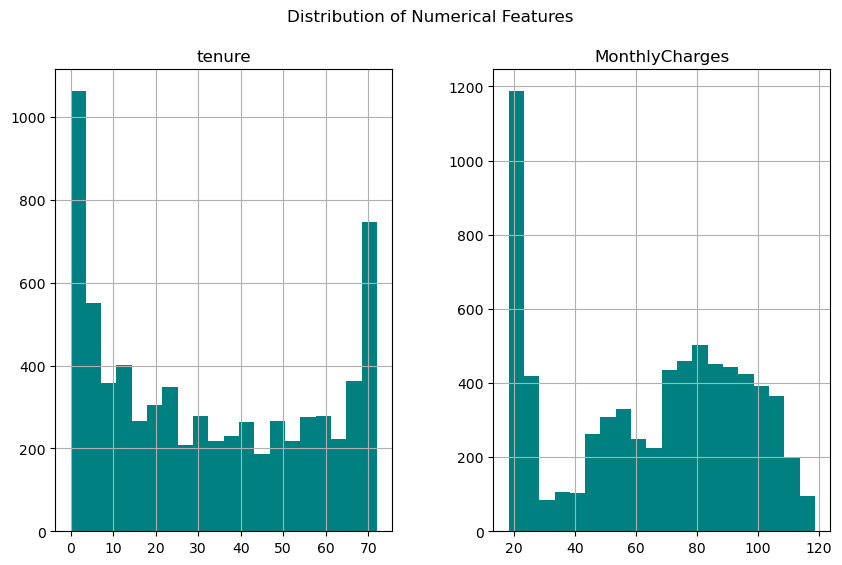

In [93]:
# Visualize numerical features
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols].hist(bins=20, figsize=(10,6), color='teal')
plt.suptitle("Distribution of Numerical Features")
plt.show()


CUSTOMER SEGMENTATION VISUALIZATION 

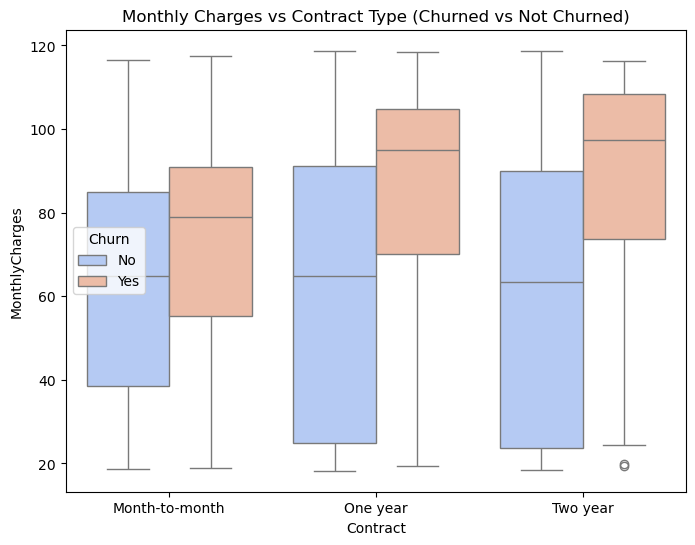

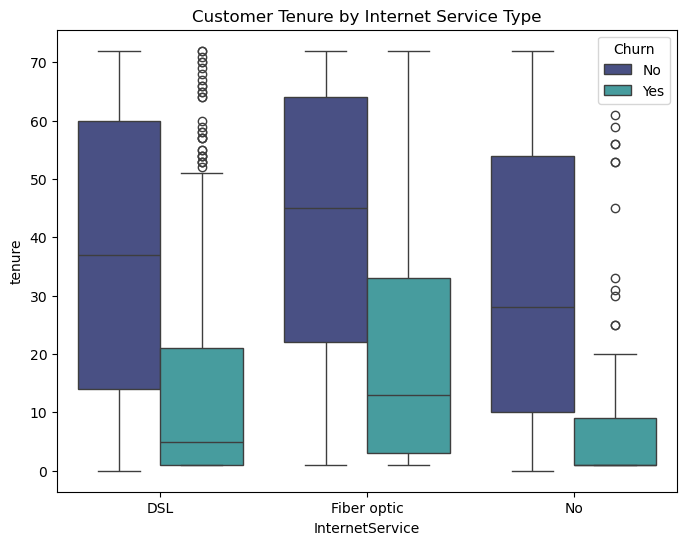

In [94]:
# Segment customers by tenure and contract type
plt.figure(figsize=(8,6))
sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df, palette='coolwarm')
plt.title("Monthly Charges vs Contract Type (Churned vs Not Churned)")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x='InternetService', y='tenure', hue='Churn', data=df, palette='mako')
plt.title("Customer Tenure by Internet Service Type")
plt.show()

# STAGE THREE: CLEAN AND PREPARE THE DATA 

In [95]:
# CLEAN AND PREPARE THE DATA 
#REPLACE SPACES WITH NAN 
df = df.replace('' '', np.nan)




In [96]:
# CONVERT THE COLUMN TotalCharges TO NUMERIC 

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [97]:
#HANDLE MISSING VALUES 

df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [98]:
# DROP COLUMNS THAT ARE NOT IMPORTANT 
df = df.drop(['customerID'], axis=1)

# STAGE FOUR: ENCODE CATEGORICAL COLUMNS 

In [99]:


# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

In [100]:
# Use Label Encoding
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [101]:
# CHECK IF THE ENCODER WORKED BY VIEWING THE COLUMNS 
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


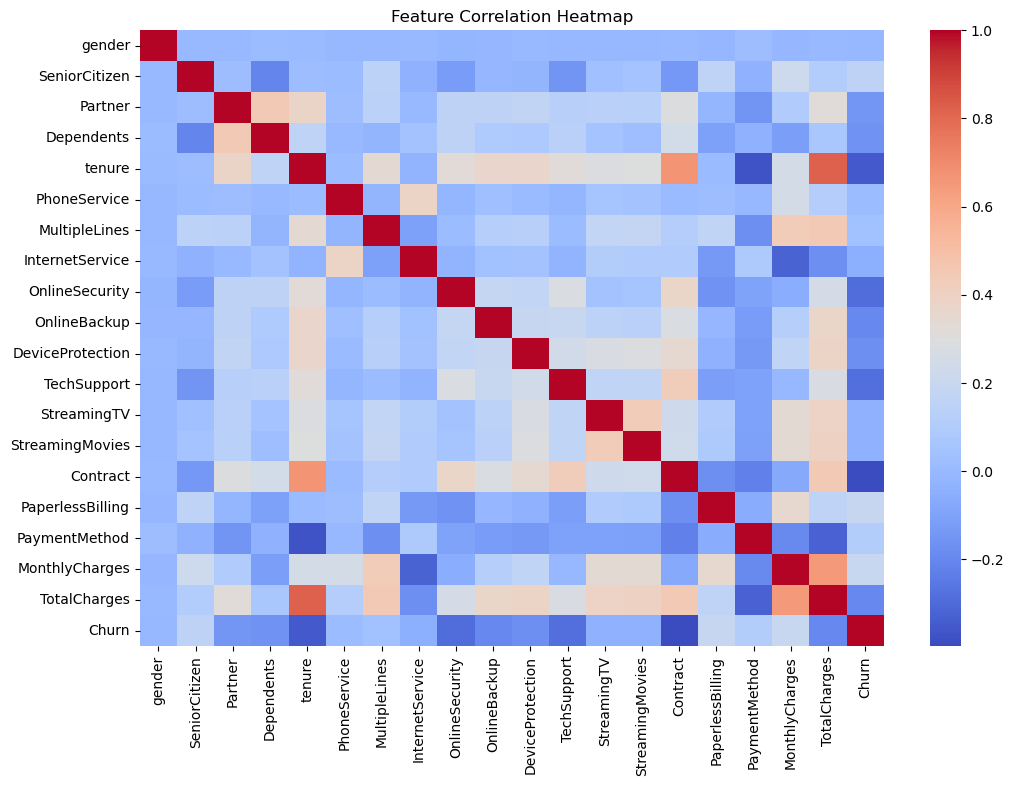

In [102]:
# Correlation heatmap

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# STAGE FIVE: SPLIT DATA INTO TRAIN AND TEST SETS 

In [103]:


X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# STAGE SIX: TRAIN A RANDOM FOREST MODEL, THE BASELINE MODEL 

In [104]:


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# STAGE SEVEN: ADVANCED MODEL: XGBoost + Cross-Validation + GridSearchCV

In [105]:
#CROSS VALIDATION 
from sklearn.model_selection import cross_val_score, GridSearchCV
from xgboost import XGBClassifier

xgb_base = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# 5-fold cross-validation
cv_scores = cross_val_score(xgb_base, X_train, y_train, cv=5, scoring='accuracy')
print(f"Average Cross-Validation Accuracy: {cv_scores.mean():.4f}")


C:\ProgramData\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:52:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\ProgramData\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:52:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\ProgramData\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:52:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\ProgramData\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:52:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

Average Cross-Validation Accuracy: 0.7756


C:\ProgramData\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:52:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [106]:
# HYPERPARAMETER TUNING WITH GRIDSEARCHCV 
params = {
    'max_depth': [3, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=params,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print(f"Best CV Accuracy: {grid_search.best_score_:.4f}")



Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best CV Accuracy: 0.8069


C:\ProgramData\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:52:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [107]:
#TRAIN XGBOOST MODEL 

best_xgb = grid_search.best_estimator_
best_xgb.fit(X_train, y_train)

y_pred_xgb = best_xgb.predict(X_test)

print("Tuned XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


Tuned XGBoost Accuracy: 0.8133427963094393

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409



C:\ProgramData\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:52:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


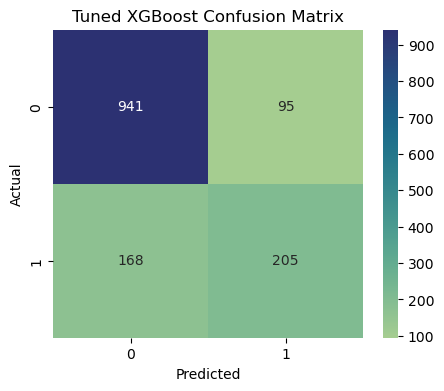

In [108]:
#CONFUSION MATRIX 

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='crest')
plt.title("Tuned XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




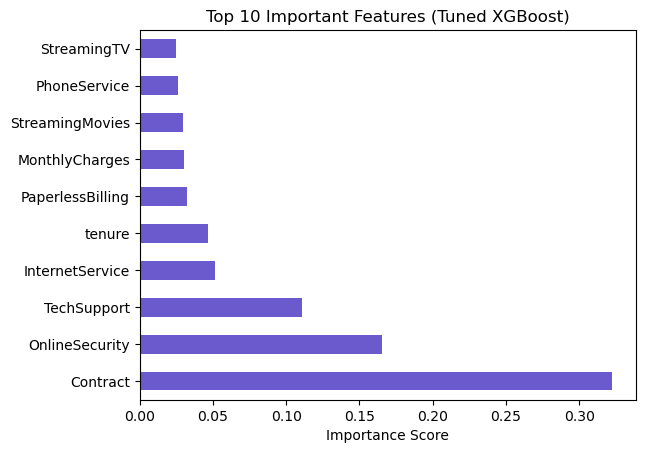

In [109]:
#FEAUTURE IMPORTANCE 
# Feature importance
importances = pd.Series(best_xgb.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', color='slateblue')
plt.title("Top 10 Important Features (Tuned XGBoost)")
plt.xlabel("Importance Score")
plt.show()

# STAGE EIGHT: FINAL MODEL COMPARISON TABLE 

In [110]:
# MODEL COMPARISON TABLE 

results = pd.DataFrame({
    'Model': ['Random Forest', 'Tuned XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_xgb)
    ]
})
results


,Model,Accuracy
0,Random Forest,0.792051
1,Tuned XGBoost,0.813343


# STAGE NINE CONCLUSION(EXECUTIVE + TECHNICAL)

# EXECUTIVE SUMMARY

Using the Telco Customer Churn dataset and two models (Random Forest baseline and a tuned XGBoost), the tuned XGBoost model produced the best performance. The tuned model improved overall accuracy compared to the baseline and highlights clear business levers for reducing churn.

# TECHNICAL SUMMARY

Baseline (Random Forest) accuracy: 0.7921 (79.21%).

Tuned XGBoost accuracy: 0.8133 (81.33%).
→ Net improvement: ~2.12 percentage points in accuracy after cross-validation and GridSearchCV tuning.

A feature importance chart was produced for the tuned XGBoost model; the most visually-dominant predictors (top drivers) in the model are:

Contract type (month-to-month vs long-term)

Tenure

MonthlyCharges

TechSupport (whether the customer has tech support)

InternetService type

EDA (boxplots and correlation heatmap) shows the same patterns: customers on month-to-month contracts with low tenure and high monthly charges are disproportionately likely to churn.

# Business Recommendations (Actionable)

Target month-to-month customers with retention offers

Offer timed discounts or incentives to customers on month-to-month plans approaching monthly renewal (e.g., targeted 3–6 month discount or a loyalty credit).

Rationale: Contract type is the top predictor; moving customers to longer contracts reduces churn probability.